In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

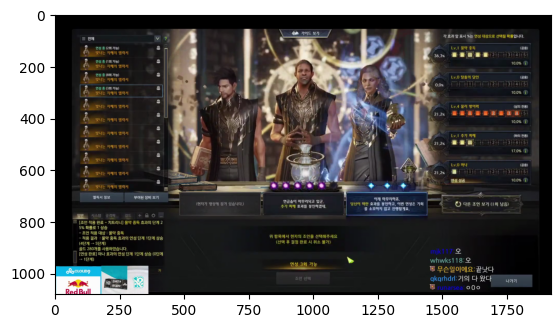

In [29]:
img = Image.open('data/raw/done/[23_3_16] 패치 적용 하스스톤 전장, 로스트아크 숙제, 엘릭서 I 포셔의 풀영상.mp4_045958.063.png')
raw_img_np = np.array(img)
plt.imshow(raw_img_np)

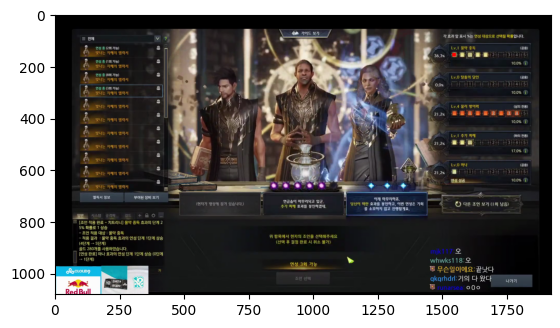

In [30]:
img_np = raw_img_np.copy()
left_top = (157,1542) # (h,w)
right_bottom = (608,1813) # (h,w)
width = right_bottom[1] - left_top[1]
height = right_bottom[0] - left_top[0]
per_slot_width_ratio = 15/width
abs_slot_width = int(per_slot_width_ratio*width)
per_slot_height_ratio = 15/height
abs_slot_height = int(per_slot_height_ratio*height)
img_np[left_top[0]-abs_slot_height//2:left_top[0]+abs_slot_height//2, left_top[1]-abs_slot_width//2:left_top[1]+abs_slot_width//2] = [255,0,0]
plt.imshow(img_np)

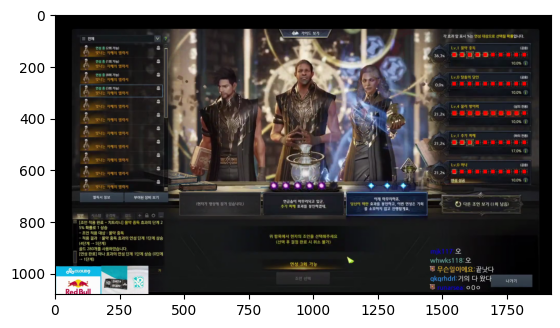

In [31]:
slot_spacing_width = width/9
slot_spacing_height = height/4
for i in range(10):
    for j in range(5):
        img_np[left_top[0]+int(j*slot_spacing_height)-abs_slot_height//2:left_top[0]+int(j*slot_spacing_height)+abs_slot_height//2, left_top[1]+int(i*slot_spacing_width)-abs_slot_width//2:left_top[1]+int(i*slot_spacing_width)+abs_slot_width//2] = [255,0,0]
plt.imshow(img_np)

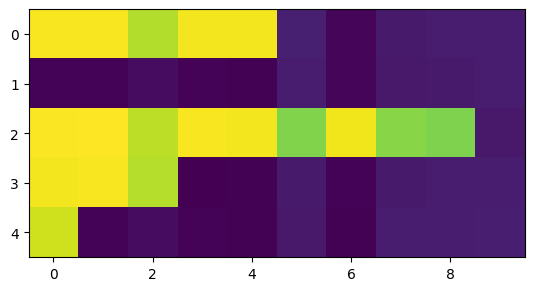

In [32]:
img_np = raw_img_np.copy()
color_average = np.zeros((5,10,3))
for i in range(10):
    for j in range(5):
        color_average[j,i] = np.mean(img_np[left_top[0]+int(j*slot_spacing_height)-abs_slot_height//2:left_top[0]+int(j*slot_spacing_height)+abs_slot_height//2, left_top[1]+int(i*slot_spacing_width)-abs_slot_width//2:left_top[1]+int(i*slot_spacing_width)+abs_slot_width//2], axis=(0,1))
plt.imshow(color_average[:,:,0].astype(np.uint8))